In [2]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
data = pd.read_csv("../given/practical1/inpatientCharges.csv")
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [28]:
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [29]:
data = data.rename(columns={" Total Discharges ": "Total Discharges", " Average Total Payments ": "Average Total Payments", " Average Covered Charges ": "Average Covered Charges"})
data.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [30]:
 data[[ "Average Covered Charges", "Average Total Payments", "Average Medicare Payments"]] = pd.DataFrame([data["Average Covered Charges"].str.lstrip("$").astype("float32"), data["Average Total Payments"].str.lstrip("$").astype("float32"), data["Average Medicare Payments"].str.lstrip("$").astype("float32")]).T

In [31]:
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.070312,5777.240234,4763.729980
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.849609,5787.569824,4976.709961
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.371094,5434.950195,4453.790039
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280273,5417.560059,4129.160156
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.269531,5658.330078,4851.439941


In [36]:
x = data.loc[:, ["Average Covered Charges", "Average Total Payments"]]
y = data["Average Medicare Payments"]

In [37]:
x_tr, x_test, y_tr, y_test  = train_test_split(x, y, test_size=0.2, random_state=200)

In [38]:
model =LinearRegression().fit(x_tr, y_tr)

In [42]:
f"The equation is y={model.intercept_} + {model.coef_[0]} x1 + {model.coef_[1]} x2"

'The equation is y=-667.0986328125 + 0.0016078572953119874 x1 + 0.9378339052200317 x2'

In [43]:
trainYPred = model.predict(x_tr)
trainYPred

array([3248.6646, 4626.3613, 9063.416 , ..., 6334.27  , 2446.6672,
       5471.9897], dtype=float32)

In [44]:
r2_score(y_tr, trainYPred)

0.9785880446434021

In [45]:
testYPred = model.predict(x_test)

In [46]:
r2_score(y_test, testYPred)

0.9799671769142151

<Axes: xlabel='Average Medicare Payments', ylabel='Density'>

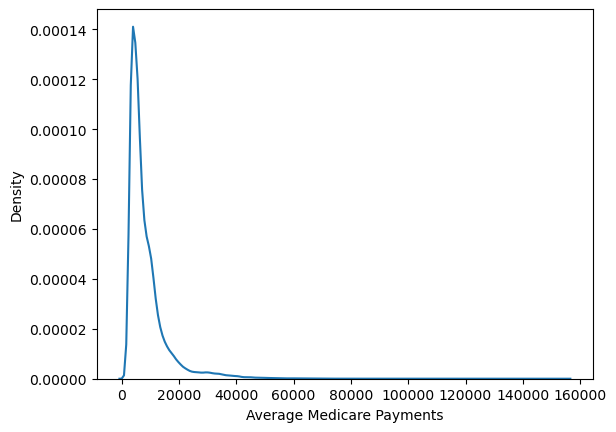

In [58]:
# after correcting the "Total Medicare Payments"
import seaborn as sns
import numpy as np
sns.kdeplot(data["Average Medicare Payments"])

In [59]:
targetLog = np.log(data["Average Medicare Payments"])

In [60]:
x_tr, x_test, y_tr, y_test = train_test_split(x, targetLog, test_size=0.2,random_state=200)

In [61]:
modelImp = LinearRegression().fit(x_tr, y_tr)


R2 train score -313319936.0
R2 test score -311153920.0


In [62]:
trainPred =modelImp.predict(x_tr)
trainPred

array([8.415026, 8.521207, 8.859594, ..., 8.655859, 8.353692, 8.587768],
      dtype=float32)

In [63]:
testPred =modelImp.predict(x_test)
testPred

array([ 8.814972,  8.711182,  8.35794 , ..., 10.096473,  8.445433,
        8.617802], dtype=float32)

In [64]:
print("R2 train score", r2_score(y_tr, trainPred))
print("R2 test score", r2_score(y_test, testPred))

R2 train score 0.7807117700576782
R2 test score 0.789040207862854


In [65]:
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split